In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
movie_titles = pd.read_csv(r"/content/movie_titles.csv", encoding='ISO-8859-1',on_bad_lines='skip',header=None)
movie_titles

,0,1,2
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17429,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17430,17767,2004.0,Fidel Castro: American Experience
17431,17768,2000.0,Epoch
17432,17769,2003.0,The Company


In [2]:
#naming the columns
movie_titles.columns = ['Movie_Id','Date_of_release', 'Movie_name']
movie_titles

,Movie_Id,Date_of_release,Movie_name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17429,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17430,17767,2004.0,Fidel Castro: American Experience
17431,17768,2000.0,Epoch
17432,17769,2003.0,The Company


In [3]:
# Date is integer and need to be casted to datetime
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17434 entries, 0 to 17433
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movie_Id         17434 non-null  int64  
 1   Date_of_release  17427 non-null  float64
 2   Movie_name       17434 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 408.7+ KB


In [4]:
#casted the date to date time and then extracted only the year (kind of usless could have casted to string from the begining)
movie_titles['Date_of_release'] = pd.to_datetime(movie_titles['Date_of_release'], format='%Y')
movie_titles['Year_of_release'] = movie_titles['Date_of_release'].dt.strftime('%Y')
#dropped the first date column
movie_titles.drop(['Date_of_release'], axis='columns', inplace=True)
print(movie_titles.info())
movie_titles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17434 entries, 0 to 17433
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Movie_Id         17434 non-null  int64 
 1   Movie_name       17434 non-null  object
 2   Year_of_release  17427 non-null  object
dtypes: int64(1), object(2)
memory usage: 408.7+ KB
None


,Movie_Id,Movie_name,Year_of_release
0,1,Dinosaur Planet,2003
1,2,Isle of Man TT 2004 Review,2004
2,3,Character,1997
3,4,Paula Abdul's Get Up & Dance,1994
4,5,The Rise and Fall of ECW,2004
...,...,...,...
17429,17766,Where the Wild Things Are and Other Maurice Se...,2002
17430,17767,Fidel Castro: American Experience,2004
17431,17768,Epoch,2000
17432,17769,The Company,2003


In [5]:
#reading the data but leaving only one because it's huge
df= pd.read_csv(r"/content/combined_data_1.txt", header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
# df2= pd.read_csv(r"C:\Users\Alaa\Downloads\movies dataset\combined_data_2.txt", header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
# df3= pd.read_csv(r"C:\Users\Alaa\Downloads\movies dataset\combined_data_3.txt", header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
# df4= pd.read_csv(r"C:\Users\Alaa\Downloads\movies dataset\combined_data_4.txt", header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [6]:
print(df.info())
# print("---------------------------------------------------------------")
# print(df2.info())
# print("---------------------------------------------------------------")
# print(df3.info())
# print("---------------------------------------------------------------")
# print(df4.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509611 entries, 0 to 509610
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Cust_Id  509611 non-null  object 
 1   Rating   509463 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.8+ MB
None


In [7]:
#here i merged the data but commented it because it's very big
# df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
509606,654283,4.0
509607,1667864,5.0
509608,279635,5.0
509609,1266390,3.0


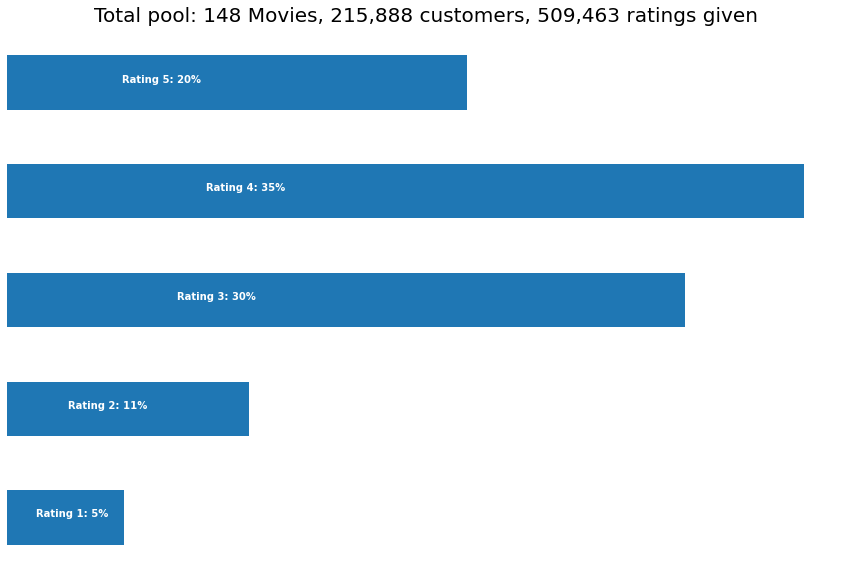

In [8]:
p = df.groupby('Rating')['Rating'].agg(['count'])

# get movie count
movie_count = df.isnull().sum()[1]

# get customer count
cust_count = df['Cust_Id'].nunique() - movie_count

# get rating count
rating_count = df['Cust_Id'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')


In [9]:
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [  1.   1.   1. ... 148. 148. 148.]
Length: 509463


In [10]:
df = df[pd.notnull(df['Rating'])]

df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
print('-Dataset examples-')
df

-Dataset examples-


<ipython-input-10-61104e76eb64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Movie_Id'] = movie_np.astype(int)
<ipython-input-10-61104e76eb64>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cust_Id'] = df['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
509606,654283,4.0,148
509607,1667864,5.0,148
509608,279635,5.0,148
509609,1266390,3.0,148


In [11]:
# here i merged the movie titles with the combined data 1 to map the ids of the movies to their names
merged_df = pd.merge(df, movie_titles, on='Movie_Id', how='left')
#dropped the ids and date because there was no longer use of them
merged_df = merged_df.drop(['Movie_Id','Year_of_release'], axis=1)
merged_df

,Cust_Id,Rating,Movie_name
0,1488844,3.0,Dinosaur Planet
1,822109,5.0,Dinosaur Planet
2,885013,4.0,Dinosaur Planet
3,30878,4.0,Dinosaur Planet
4,823519,3.0,Dinosaur Planet
...,...,...,...
509458,654283,4.0,Sweet November
509459,1667864,5.0,Sweet November
509460,279635,5.0,Sweet November
509461,1266390,3.0,Sweet November


In [12]:
#here i dropped all the rows containing rate less than 3 because less than 3 is a bad rate so that movie shouldn't be recommended
high_ratings = merged_df.drop(merged_df[merged_df['Rating'] < 3].index)

high_ratings

,Cust_Id,Rating,Movie_name
0,1488844,3.0,Dinosaur Planet
1,822109,5.0,Dinosaur Planet
2,885013,4.0,Dinosaur Planet
3,30878,4.0,Dinosaur Planet
4,823519,3.0,Dinosaur Planet
...,...,...,...
509457,730997,4.0,Sweet November
509458,654283,4.0,Sweet November
509459,1667864,5.0,Sweet November
509460,279635,5.0,Sweet November


In [13]:
#groubed the movies by customer in the form of a list so that the data would be like transacions(customer id and the movies they saw like market basket analysis)
df_grouped = high_ratings.groupby('Cust_Id')['Movie_name'].apply(list).reset_index()

df_grouped

,Cust_Id,Movie_name
0,6,[Something's Gotta Give]
1,7,"[What the #$*! Do We Know!?, Lilo and Stitch, ..."
2,42,[Something's Gotta Give]
3,79,"[Something's Gotta Give, The Powerpuff Girls M..."
4,97,[Silkwood]
...,...,...
200739,2649388,"[Something's Gotta Give, Mostly Martha]"
200740,2649401,[The Game]
200741,2649404,[Jingle All the Way]
200742,2649426,"[7 Seconds, Lilo and Stitch, Something's Gotta..."


In [14]:
#this code was for the ids before so i casted it to string so it won't be removed with the square brackets
#I removed the square brackets and splited the movies and expanded them to separated columns
df_grouped['Movie_name']= df_grouped['Movie_name'].astype(str)
df_grouped['Movie_name'] = df_grouped['Movie_name'].str.strip('[]')
movies = df_grouped['Movie_name'].str.split(',', expand=True)
movies

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,"""Something's Gotta Give""",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,'What the #$*! Do We Know!?','Lilo and Stitch',"""Something's Gotta Give""",'Silkwood',None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"""Something's Gotta Give""",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"""Something's Gotta Give""",'The Powerpuff Girls Movie',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,'Silkwood',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200739,"""Something's Gotta Give""",'Mostly Martha',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
200740,'The Game',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
200741,'Jingle All the Way',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
200742,'7 Seconds','Lilo and Stitch',"""Something's Gotta Give""",'Duplex (Widescreen)',None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [15]:
# I re-added the customer Id column because it was removed in the las step
movies['Cust_Id']=df_grouped['Cust_Id']
movies

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,Cust_Id
0,"""Something's Gotta Give""",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,6
1,'What the #$*! Do We Know!?','Lilo and Stitch',"""Something's Gotta Give""",'Silkwood',None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,7
2,"""Something's Gotta Give""",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,42
3,"""Something's Gotta Give""",'The Powerpuff Girls Movie',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,79
4,'Silkwood',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200739,"""Something's Gotta Give""",'Mostly Martha',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,2649388
200740,'The Game',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,2649401
200741,'Jingle All the Way',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,2649404
200742,'7 Seconds','Lilo and Stitch',"""Something's Gotta Give""",'Duplex (Widescreen)',None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,2649426


In [16]:
#then made it the index of the dataset
movies = movies.set_index('Cust_Id')
movies

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,"""Something's Gotta Give""",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,'What the #$*! Do We Know!?','Lilo and Stitch',"""Something's Gotta Give""",'Silkwood',None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
42,"""Something's Gotta Give""",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
79,"""Something's Gotta Give""",'The Powerpuff Girls Movie',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
97,'Silkwood',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649388,"""Something's Gotta Give""",'Mostly Martha',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2649401,'The Game',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2649404,'Jingle All the Way',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [17]:
#seeing the number of nan values in each column to decide which columns to drop
for column in movies:
  print(column,movies[column].isnull().sum())

0 0
1 102794
2 148391
3 170871
4 183156
5 190038
6 194003
7 196453
8 197977
9 198918
10 199510
11 199906
12 200138
13 200316
14 200408
15 200491
16 200546
17 200587
18 200627
19 200645
20 200666
21 200684
22 200692
23 200695
24 200699
25 200710
26 200715
27 200718
28 200722
29 200724
30 200725
31 200729
32 200730
33 200732
34 200732
35 200734
36 200735
37 200736
38 200736
39 200736
40 200738
41 200738
42 200739
43 200739
44 200740
45 200740
46 200740
47 200740
48 200741
49 200742
50 200742
51 200742
52 200742
53 200742
54 200742
55 200742
56 200742
57 200742
58 200742
59 200742
60 200742
61 200742
62 200742
63 200742
64 200742
65 200742
66 200742
67 200742
68 200742
69 200742
70 200742
71 200742
72 200742
73 200742
74 200742
75 200742
76 200742
77 200742
78 200742
79 200742
80 200742
81 200742
82 200742
83 200742
84 200742
85 200742
86 200742
87 200742
88 200742
89 200742
90 200742
91 200742
92 200742
93 200742
94 200742
95 200742
96 200742
97 200742
98 200742
99 200742
100 200742
101 

In [18]:
#I removed the columns which had 186000 nulls and above
movies = movies.drop(movies.iloc[:, 16:94],axis = 1)
movies

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,"""Something's Gotta Give""",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,'What the #$*! Do We Know!?','Lilo and Stitch',"""Something's Gotta Give""",'Silkwood',None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
42,"""Something's Gotta Give""",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
79,"""Something's Gotta Give""",'The Powerpuff Girls Movie',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
97,'Silkwood',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649388,"""Something's Gotta Give""",'Mostly Martha',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2649401,'The Game',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2649404,'Jingle All the Way',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [19]:
!pip install -U mlxtend
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [20]:
#making a list of list to contain each watched except for the nans
watched = []
for i in range(len(movies)):
    row = []
    for j in range(5):
        if isinstance(movies.iloc[i,j], str):
            row.append(str(movies.iloc[i,j]))
    watched.append(row)
watched

[['"Something\'s Gotta Give"'],
 ["'What the #$*! Do We Know!?'",
  " 'Lilo and Stitch'",
  ' "Something\'s Gotta Give"',
  " 'Silkwood'"],
 ['"Something\'s Gotta Give"'],
 ['"Something\'s Gotta Give"', " 'The Powerpuff Girls Movie'"],
 ["'Silkwood'"],
 ['"Something\'s Gotta Give"'],
 ["'Lilo and Stitch'",
  " 'Jade'",
  " 'Dragonheart'",
  " 'Congo'",
  " 'Rambo: First Blood Part II'"],
 ['"Something\'s Gotta Give"'],
 ['"Something\'s Gotta Give"'],
 ['"Something\'s Gotta Give"', " 'Spartan'", " 'Rambo: First Blood Part II'"],
 ["'Duplex (Widescreen)'"],
 ["'The Game'"],
 ['"Something\'s Gotta Give"', " 'Duplex (Widescreen)'", " 'The Game'"],
 ["'Lilo and Stitch'", ' "Something\'s Gotta Give"', " 'Jingle All the Way'"],
 ["'Spartan'"],
 ['"Something\'s Gotta Give"'],
 ["'Lilo and Stitch'",
  ' "Something\'s Gotta Give"',
  " 'Duplex (Widescreen)'",
  " 'The Game'"],
 ['"Something\'s Gotta Give"'],
 ["'Spitfire Grill'", " 'Dragonheart'"],
 ['"Something\'s Gotta Give"'],
 ['"Something\'

In [21]:
#Converting the transaction data to a one-hot encoded forma
te = TransactionEncoder()
te_ary = te.fit(watched).transform(watched)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [28]:
#dfining a function for frequent items so the user can put his own min support
def frequent_items():
  minSupport= float(input("enter min support: "))
  frequent_itemsets = apriori(df, min_support= minSupport, use_colnames=True)
  frequent_itemsets.sort_values(by="support",ascending=False)
  return frequent_itemsets

In [29]:
#dfining a function for frequent items so the user can put his own min confidence
def Rules(frequent_itemsets):
  minConf= float(input("enter min confidence: "))
  rules = association_rules(frequent_itemsets, metric="lift", min_threshold=minConf)
  rules.sort_values(by=["support","confidence"],ascending=False)
  return rules

In [30]:
frequent_itemsets = frequent_items()
frequent_itemsets

enter min support.03


,support,itemsets
0,0.145016,"( ""Something's Gotta Give"")"
1,0.057551,( 'Dragonheart')
2,0.079340,( 'Duplex (Widescreen)')
3,0.030875,( 'Lilo and Stitch')
4,0.032898,( 'Mostly Martha')
5,0.050143,( 'Rambo: First Blood Part II')
6,0.061317,( 'Silkwood')
7,0.050617,( 'Spartan')
8,0.113189,( 'The Game')
9,0.393959,"(""Something's Gotta Give"")"


In [31]:
# so we can see that the strongest relations are:-
# Rule 0: Lilo and Stitch -> Something's Gotta Give
# Rule 1: Something's Gotta Give -> Lilo and Stitch
#as they have high lift and confidence

rules=Rules(frequent_itemsets)
rules

enter min confidence1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,('Lilo and Stitch'),"( ""Something's Gotta Give"")",0.150132,0.145016,0.071389,0.475513,3.279046,0.049618,1.630134
1,"( ""Something's Gotta Give"")",('Lilo and Stitch'),0.145016,0.150132,0.071389,0.492288,3.279046,0.049618,1.673919
2,"(""Something's Gotta Give"")",( 'Duplex (Widescreen)'),0.393959,0.079340,0.039946,0.101397,1.278011,0.008690,1.024546
3,( 'Duplex (Widescreen)'),"(""Something's Gotta Give"")",0.079340,0.393959,0.039946,0.503485,1.278011,0.008690,1.220588
4,"(""Something's Gotta Give"")",( 'The Game'),0.393959,0.113189,0.045546,0.115610,1.021388,0.000954,1.002737
5,( 'The Game'),"(""Something's Gotta Give"")",0.113189,0.393959,0.045546,0.402385,1.021388,0.000954,1.014099
